Importing Libraries


In [ ]:
import os
import librosa
import tensorflow as tf
import numpy as  np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam

Checking Install Versions

In [ ]:
print(f"TensorFlow: {tf.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
import sklearn
print(f"scikit-learn: {sklearn.__version__}")


TensorFlow: 2.18.0
Numpy: 1.26.4
Matplotlib: 3.10.0
Librosa: 0.10.2.post1
scikit-learn: 1.6.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Provide your path of file
data_path = './genres_original/blues'


Visualizing Single Audio File for Understanding--

In [ ]:
selected_file = os.path.join(data_path, 'blues.00000.wav')

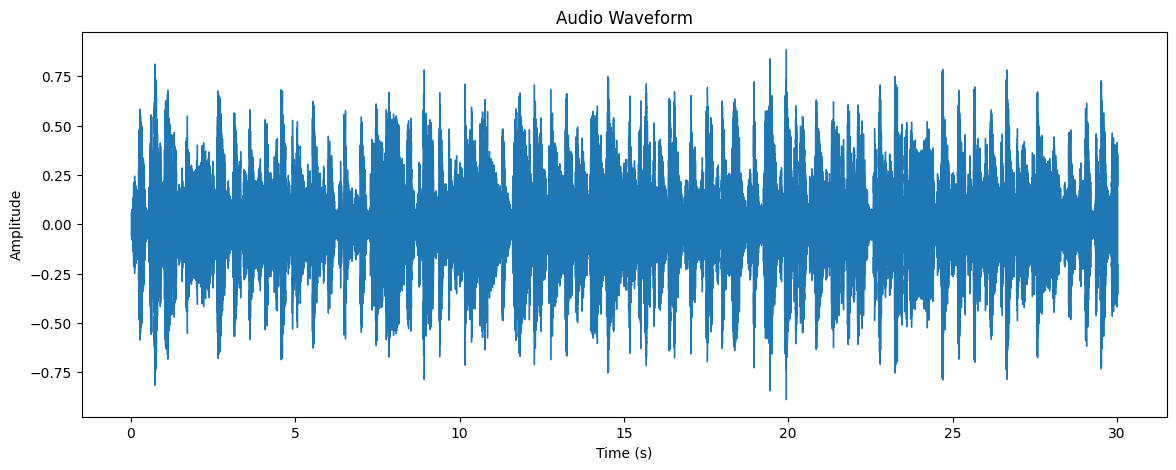

In [ ]:
y, sr = librosa.load(selected_file, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

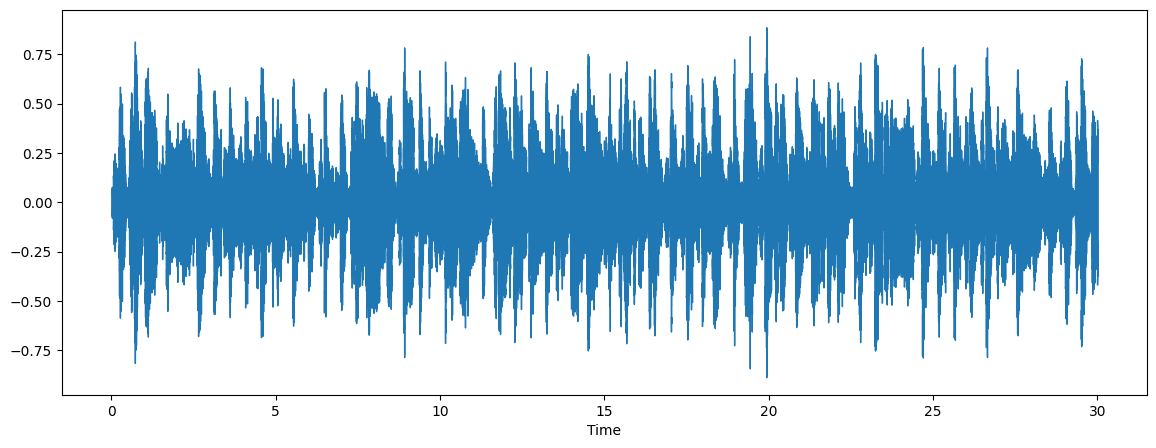

In [ ]:
y,sr = librosa.load(selected_file, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

Playing Soung For Testing

In [ ]:
from IPython.display import Audio
Audio(data=y,rate=sr)

Output hidden; open in https://colab.research.google.com to view.

Dividing selected file into chunks and Visualizing

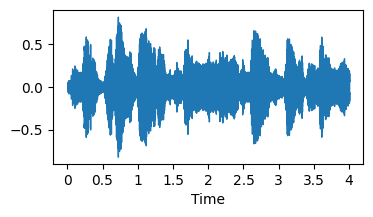

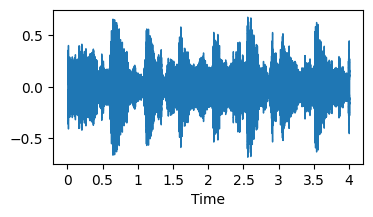

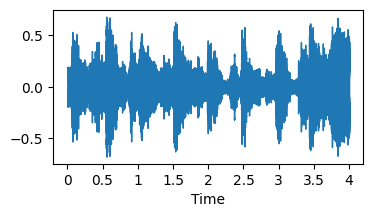

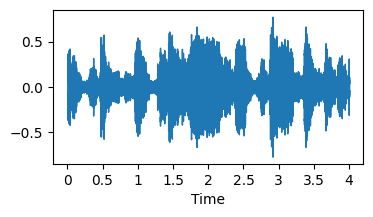

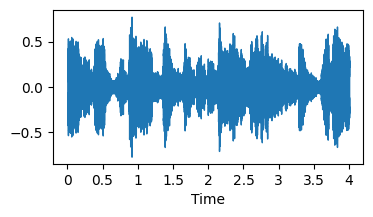

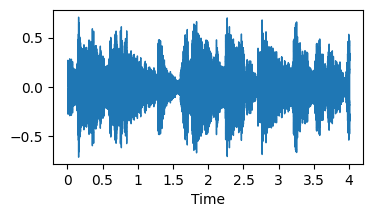

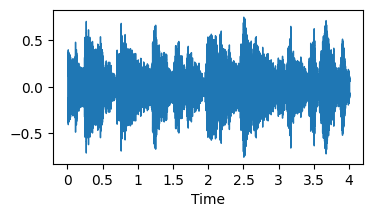

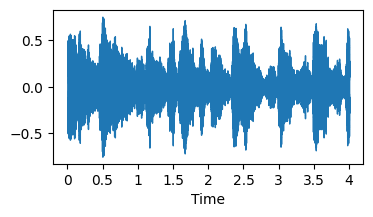

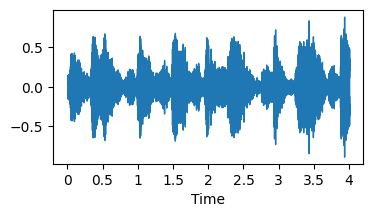

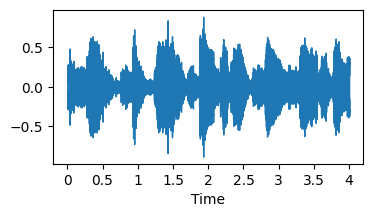

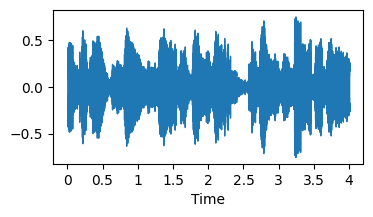

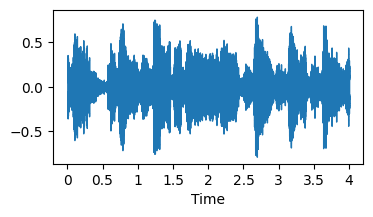

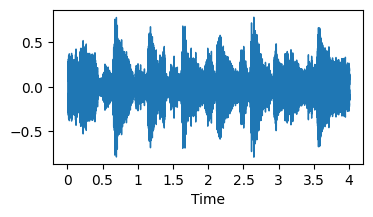

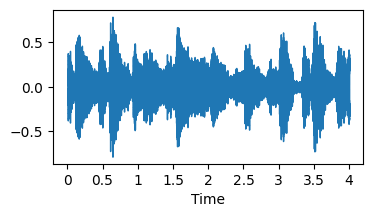

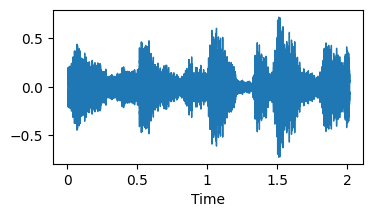

In [ ]:
audio_path  ="./blues.00000.wav"
y, sr = librosa.load(selected_file,sr=None)
chunk_duration = 4
overlap_duration = 2

#convert durattion to sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

#calculate the number of chunks
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1


#iterate over each chunks
for i in range(num_chunks):
    #calculate start and end index of the chunk
    start = i*(chunk_samples-overlap_samples)
    end = min(start + chunk_samples, len(y))
    chunk = y[start:end]
    #extract chunk audio
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()

Now Visualization by Melspectrogram (Generating full length Melspectrogram)

In [ ]:
def plot_melspectrogram(y,sr):
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #convert decibels
    spectrogram_db =librosa.power_to_db(spectrogram,ref=np.max)
    #visualize spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

In [ ]:
y,sr = librosa.load(selected_file,sr=44100)

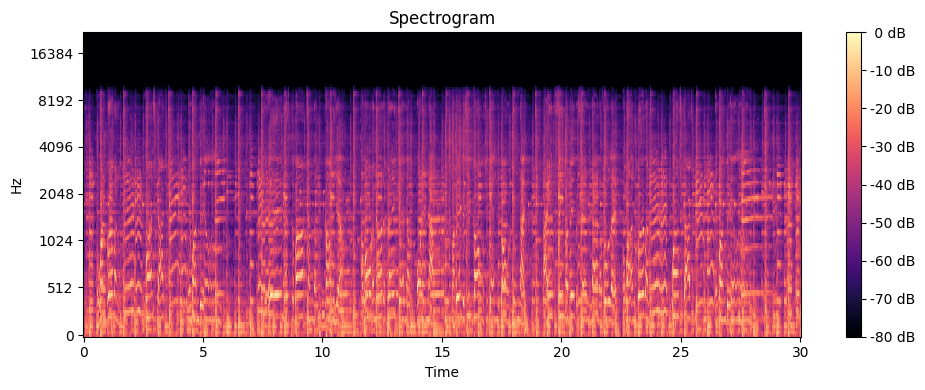

In [ ]:
plot_melspectrogram(y,sr)

Visualization of each chunk through Melspectrogram (4 seconds chunks)

In [ ]:
def plot_melspectrogram_chunks(y,sr):
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1


#iterate over each chunks
    for i in range(num_chunks):
        start = i*(chunk_samples-overlap_samples)
        end = min(start + chunk_samples, len(y))
        chunk = y[start:end]
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db =librosa.power_to_db(spectrogram,ref=np.max)
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [ ]:
y,sr = librosa.load(selected_file,sr=44100)

In [ ]:
plot_melspectrogram_chunks(y,sr)

Output hidden; open in https://colab.research.google.com to view.

Creating classes

In [ ]:
data_dir = './genres_original' #provide your dataset path..
classes =['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

Loading Dataset and Preprocessing (Chunking + Processing)

In [ ]:
from tensorflow.image import resize

#load and pre process audio data

def load_and_preprocess_data(data_dir,classess,target_shape=(140,140)):
    data=[]
    labels=[]

    for i_class, class_name in enumerate(classess):
        class_dir =os.path.join(data_dir,class_name)
        print("Processing of Dataset--",class_name)
        for file_name in os.listdir(class_dir):
            if(file_name.endswith('.wav')):
                file_path = os.path.join(class_dir,file_name)
                audio_data, sample_rate = librosa.load(file_path,sr=None)
                ##preprocessing start
                chunk_duration = 4
                overlap_duration = 2

               # convert durattion to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                #calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1


                #iterate over each chunks
                for i in range(num_chunks):
                    #calculate start and end index of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    chunk = audio_data[start:end]
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    return np.array(data),np.array(labels)

In [ ]:

data, labels = load_and_preprocess_data(data_dir, classes)

Processing of Dataset-- blues
Processing of Dataset-- classical
Processing of Dataset-- country
Processing of Dataset-- disco
Processing of Dataset-- hiphop
Processing of Dataset-- jazz
Processing of Dataset-- metal
Processing of Dataset-- pop
Processing of Dataset-- reggae
Processing of Dataset-- rock


In [ ]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Splitting of dataset for training set and test set

In [ ]:
from  sklearn.model_selection  import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(11980, 140, 140, 1)

In [ ]:
Y_train.shape

(11980, 10)

In [ ]:
X_test.shape

(2995, 140, 140, 1)

In [ ]:
Y_test.shape

(2995, 10)

Working on Model Building

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
X_train[0].shape

(140, 140, 1)

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.3))

In [ ]:

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [ ]:

model.add(Dropout(0.3))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1200,activation='relu'))

In [ ]:

model.add(Dropout(0.45))

In [ ]:
model.add(Dense(units=len(classes),activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 140, 140, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 140, 140, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 70, 70, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 70, 70, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 70, 70, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 35, 35, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 35, 35, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 17, 17, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200)                │       9,831,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,555,258 (55.52 MB)

 Trainable params: 14,555,258 (55.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compile model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
Training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 64s 127ms/step - accuracy: 0.2015 - loss: 2.1391 - val_accuracy: 0.4321 - val_loss: 1.5966
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.5137 - loss: 1.3792 - val_accuracy: 0.6120 - val_loss: 1.1128
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.6286 - loss: 1.0686 - val_accuracy: 0.6945 - val_loss: 0.9042
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.6918 - loss: 0.8735 - val_accuracy: 0.6878 - val_loss: 0.9182
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.7536 - loss: 0.7156 - val_accuracy: 0.7863 - val_loss: 0.6149
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.8147 - loss: 0.5456 - val_accuracy: 0.8017 - val_loss: 0.5891
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.8372 - loss: 0.4688 - val_accuracy: 0.8267 - val_loss: 0.5071
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.8614 - loss: 0.3898 -

In [ ]:
Training_history.history

{'accuracy': [0.2989148497581482,
  0.5376460552215576,
  0.644407331943512,
  0.7083472609519958,
  0.768030047416687,
  0.8144407272338867,
  0.846828043460846,
  0.872120201587677,
  0.8880634307861328,
  0.9085142016410828,
  0.927879810333252,
  0.9392320513725281,
  0.9419031739234924,
  0.953171968460083,
  0.9622704386711121,
  0.964691162109375,
  0.9722036719322205,
  0.971953272819519,
  0.9737061858177185,
  0.9773789644241333,
  0.9771285653114319,
  0.9846410751342773,
  0.984557569026947,
  0.9828881621360779,
  0.985308825969696,
  0.9764607548713684,
  0.9874791502952576,
  0.9881469011306763,
  0.988480806350708,
  0.9866443872451782],
 'loss': [1.9094773530960083,
  1.3111066818237305,
  1.0288218259811401,
  0.8438639044761658,
  0.6810131072998047,
  0.5455339550971985,
  0.4470864534378052,
  0.3691469728946686,
  0.31873631477355957,
  0.27437302470207214,
  0.20836614072322845,
  0.18425637483596802,
  0.164882630109787,
  0.13735516369342804,
  0.12307688593864

In [ ]:
model.save('Trained_model.keras') ## saving model


In [ ]:
import json
with open("Training_history.json",'w') as f:
  json.dump(Training_history.history,f)

In [ ]:
model = tf.keras.models.load_model("Trained_model.keras") #provide path according to your folder structure
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 140, 140, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 140, 140, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 70, 70, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 70, 70, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 70, 70, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 35, 35, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 35, 35, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 17, 17, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200)                │       9,831,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 43,665,776 (166.57 MB)

 Trainable params: 14,555,258 (55.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,110,518 (111.05 MB)

In [ ]:
import json
with open("Training_history.json",'r') as json_file:
  Training_history_data = json.load(json_file)


In [ ]:
Training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Model Evaluation - 1

In [ ]:
train_loss , train_accuracy = model.evaluate(X_train,Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9924 - loss: 0.0262


In [ ]:
train_loss,train_accuracy

(0.028348496183753014, 0.9919866323471069)

In [ ]:
val_loss, val_accuracy=model.evaluate(X_test,Y_test)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9153 - loss: 0.3773


In [ ]:
val_loss,val_accuracy

(0.3273022472858429, 0.9232053160667419)

Accuracy & Loss Visualization


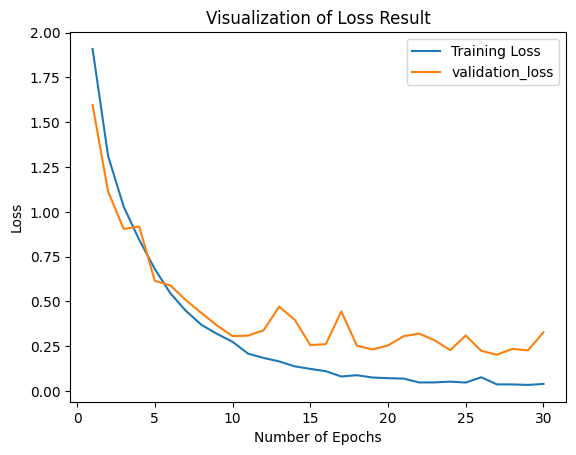

In [ ]:
##visualzation of loss
epochs =[i for i in range(1,31)]
plt.plot(epochs,Training_history_data['loss'],label="Training Loss")
plt.plot(epochs,Training_history_data['val_loss'],label="validation_loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss")
plt.legend()
plt.show()

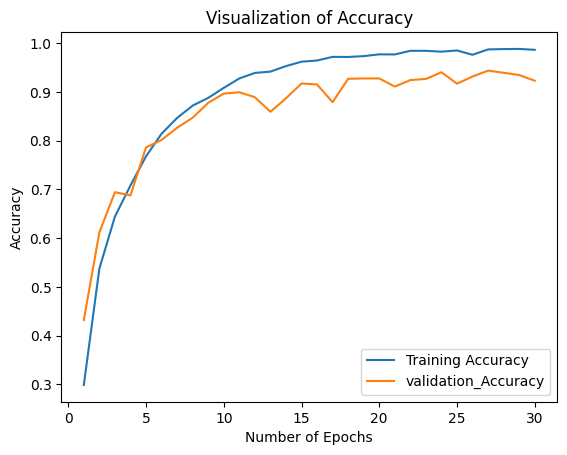

In [ ]:
##visualzation of accuracy
epochs =[i for i in range(1,31)]
plt.plot(epochs,Training_history_data['accuracy'],label="Training Accuracy")
plt.plot(epochs,Training_history_data['val_accuracy'],label="validation_Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()

In [ ]:
train_accuracy

0.9919866323471069

In [ ]:
val_accuracy

0.9232053160667419

Precision, Recall, Confusion  Matrix - Model Evaluation-2

In [ ]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


array([[3.4290019e-22, 1.2076022e-22, 2.4467180e-24, ..., 9.9999964e-01,
        1.8582094e-15, 1.1417505e-18],
       [1.3015590e-12, 4.1012353e-17, 2.0256855e-18, ..., 3.5790191e-16,
        2.7006972e-10, 3.2895031e-08],
       [6.2311874e-06, 4.0228432e-11, 5.2638985e-05, ..., 1.5164813e-05,
        1.9447740e-04, 1.0672675e-02],
       ...,
       [3.8144508e-01, 4.1969230e-11, 2.5614222e-06, ..., 2.5900945e-07,
        1.7926524e-05, 6.1729991e-01],
       [1.4018890e-07, 9.9992025e-01, 9.8965749e-08, ..., 1.1815334e-08,
        1.0385848e-08, 2.8456711e-07],
       [2.8922797e-17, 2.2425841e-22, 3.3725993e-21, ..., 1.0391531e-08,
        9.4064496e-12, 2.7645349e-15]], dtype=float32)

In [ ]:
y_pred.shape

(2995, 10)

In [ ]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 9, 1, 4])

In [ ]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4])

In [ ]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(true_categories,predicted_categories)


print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.91      0.92      0.92       302
   classical       0.98      0.94      0.96       298
     country       0.88      0.90      0.89       317
       disco       0.96      0.93      0.94       312
      hiphop       0.96      0.93      0.95       277
        jazz       0.83      0.99      0.90       311
       metal       0.99      0.91      0.95       302
         pop       0.98      0.88      0.93       289
      reggae       0.95      0.94      0.94       296
        rock       0.85      0.89      0.87       291

    accuracy                           0.92      2995
   macro avg       0.93      0.92      0.92      2995
weighted avg       0.93      0.92      0.92      2995



Confusion Matrix


In [ ]:
cm

array([[277,   0,   7,   0,   0,  12,   0,   0,   1,   5],
       [  1, 281,   0,   0,   0,  15,   0,   0,   0,   1],
       [  2,   0, 285,   0,   0,  18,   0,   0,   1,  11],
       [  4,   1,   4, 289,   2,   1,   0,   1,   4,   6],
       [  1,   0,   1,   6, 258,   0,   2,   4,   4,   1],
       [  2,   1,   0,   0,   0, 308,   0,   0,   0,   0],
       [  6,   0,   5,   2,   1,   1, 275,   0,   0,  12],
       [  0,   3,   6,   2,   7,   7,   0, 255,   2,   7],
       [  4,   0,   6,   1,   1,   4,   0,   1, 278,   1],
       [  6,   2,   9,   2,   0,   7,   2,   0,   4, 259]])

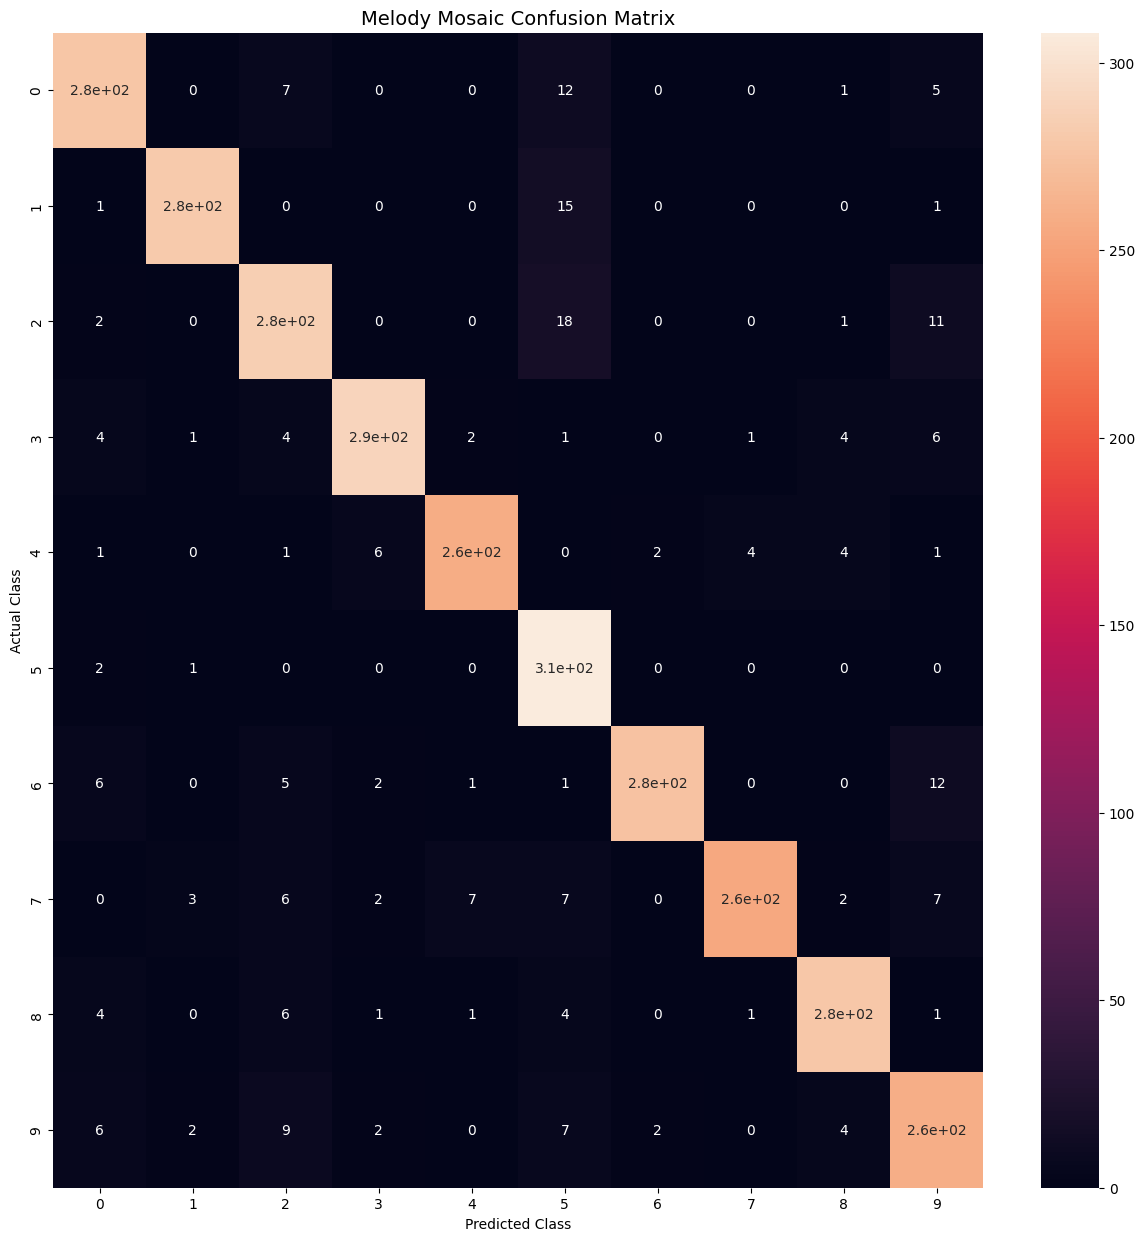

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Melody Mosaic Confusion Matrix",fontsize=14)

plt.show()

In [ ]:
print("Completed")

Completed
